In [1]:
from google.colab import files


uploaded=files.upload()

Saving dataset2.csv to dataset2.csv


In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

dataset = pd.read_csv('dataset2.csv')

dataset.columns = ['pregnant', 'glucose', 'blood pressure', 'skin thickness', 'insulin', 'bmi', 'diabetes pedigree', 'age', 'class']

X = dataset.drop('class', axis=1)
y = dataset['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

Naive Bayes modelinin doğruluk değeri: 0.7229437229437229


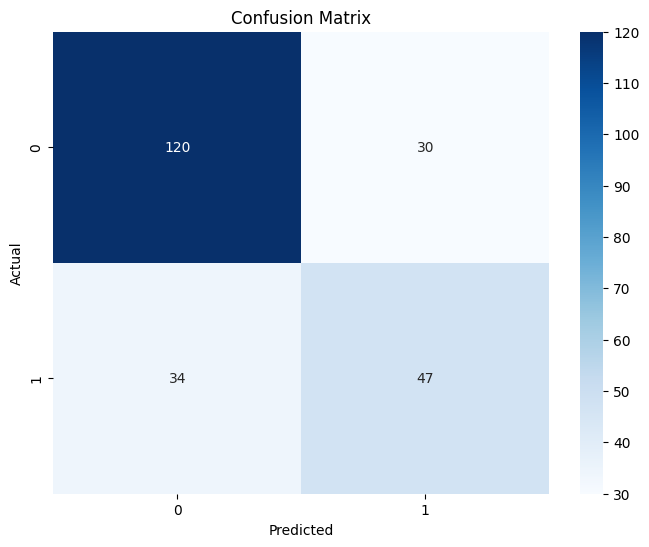

Accuracy: 0.7229437229437229
Precision: 0.6103896103896104
Recall: 0.5802469135802469
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       150
           1       0.61      0.58      0.59        81

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



In [5]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

# Naive Bayes modelini oluşturma
naive_bayes_model = GaussianNB()

# Modeli eğitme
naive_bayes_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = naive_bayes_model.predict(X_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes modelinin doğruluk değeri:", accuracy)
# Confusion matrix oluşturma
conf_matrix = confusion_matrix(y_test, y_pred)

# Doğru ve yanlış sınıflandırılan örneklerin sayısını alın
true_neg, false_pos = conf_matrix[0]
false_neg, true_pos = conf_matrix[1]

# Doğruluk, hassasiyet ve özgüllük hesaplama
accuracy = (true_pos + true_neg) / len(y_test)
precision = true_pos / (true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


# Sınıflandırma raporu
print(classification_report(y_test, y_pred))
